In [1]:
# Cell 1: Import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./assistments_dataset.csv')
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (603128, 30)


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,20223588,245748,77759,12914,12914,1,1.0,1,57310.0,tutor,...,0,0,57310,12914,20935.0,NaN,0.0,NaN,1,1
1,20223595,245748,77759,15320,15320,1,1.0,1,88691.0,tutor,...,0,0,88691,15320,22385.0,NaN,0.0,NaN,2,2
2,20223601,245748,77759,14529,14529,1,1.0,1,43748.0,tutor,...,0,0,43748,14529,20735.0,NaN,0.0,NaN,3,3
3,20223926,245698,77912,1159,1159,1,0.0,2,45587.0,tutor,...,0,0,53599,1159,NaN,3,0.0,NaN,1,1
4,20223934,245698,77912,1647,1647,1,1.0,1,90176.0,tutor,...,0,0,90176,1647,3438.0,NaN,0.0,NaN,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603128 entries, 0 to 603127
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              603128 non-null  int64  
 1   assignment_id         603128 non-null  int64  
 2   user_id               603128 non-null  int64  
 3   assistment_id         603128 non-null  int64  
 4   problem_id            603128 non-null  int64  
 5   original              603128 non-null  int64  
 6   correct               603128 non-null  float64
 7   attempt_count         603128 non-null  int64  
 8   ms_first_response     603120 non-null  float64
 9   tutor_mode            603128 non-null  object 
 10  answer_type           603128 non-null  object 
 11  sequence_id           603128 non-null  int64  
 12  student_class_id      603128 non-null  int64  
 13  position              603128 non-null  int64  
 14  type                  603128 non-null  object 
 15  

In [4]:
# Cell 2: Check for missing values in all columns
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 order_id                     0
assignment_id                0
user_id                      0
assistment_id                0
problem_id                   0
original                     0
correct                      0
attempt_count                0
ms_first_response            8
tutor_mode                   0
answer_type                  0
sequence_id                  0
student_class_id             0
position                     0
type                         0
base_sequence_id             0
skill_id                     0
skill_name               40860
teacher_id                   0
school_id                    0
hint_count                   0
hint_total                   0
overlap_time                 0
template_id                  0
answer_id               364821
answer_text             324754
first_action                 8
bottom_hint             511268
opportunity                  0
opportunity_original    132846
dtype: int64


Remove samples with null 'skill_name'

In [5]:
df = df[df['skill_name'].notnull()].copy()
print("Shape of df (skill_name not null):", df.shape)
df.head()

Shape of df (skill_name not null): (562268, 30)


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,20223588,245748,77759,12914,12914,1,1.0,1,57310.0,tutor,...,0,0,57310,12914,20935.0,NaN,0.0,NaN,1,1
1,20223595,245748,77759,15320,15320,1,1.0,1,88691.0,tutor,...,0,0,88691,15320,22385.0,NaN,0.0,NaN,2,2
2,20223601,245748,77759,14529,14529,1,1.0,1,43748.0,tutor,...,0,0,43748,14529,20735.0,NaN,0.0,NaN,3,3
6,20223948,245698,77912,2186,2186,1,1.0,1,95637.0,tutor,...,0,0,95637,2186,NaN,4,0.0,NaN,1,1
7,20223955,245698,77912,1653,1653,1,1.0,1,227226.0,tutor,...,0,0,227226,1653,3493.0,NaN,0.0,NaN,2,2


EDA On Correct/Incorrect Answers

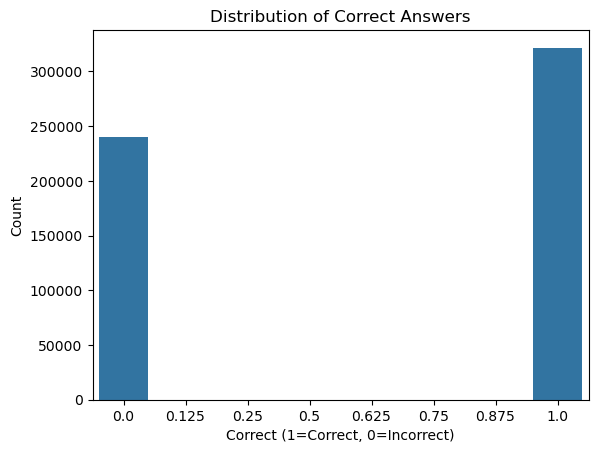

correct
1.000    0.572158
0.000    0.427538
0.250    0.000108
0.500    0.000096
0.750    0.000092
0.875    0.000004
0.625    0.000002
0.125    0.000002
Name: proportion, dtype: float64


In [6]:
# Cell 3: EDA on 'correct' (distribution of correct/incorrect answers)
sns.countplot(x='correct', data=df)
plt.title('Distribution of Correct Answers')
plt.xlabel('Correct (1=Correct, 0=Incorrect)')
plt.ylabel('Count')
plt.show()
print(df['correct'].value_counts(normalize=True))

EDA on Time Taken on Questions

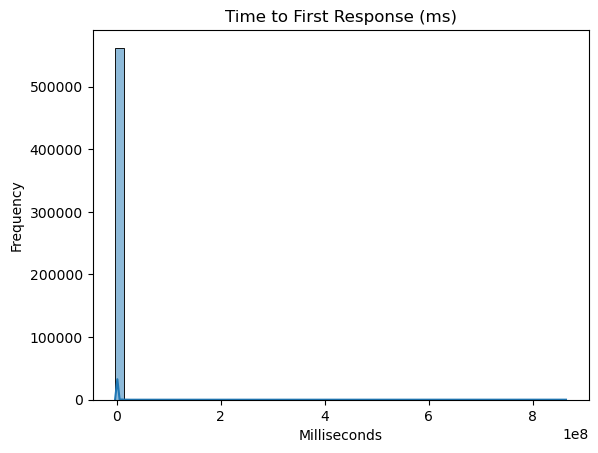

count    5.622600e+05
mean     5.891408e+04
std      1.700895e+06
min     -3.417476e+06
25%      8.547000e+03
50%      2.081200e+04
75%      4.869300e+04
max      8.643416e+08
Name: ms_first_response, dtype: float64


In [7]:
sns.histplot(df['ms_first_response'].dropna(), bins=50, kde=True)
plt.title('Time to First Response (ms)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')
plt.show()
print(df['ms_first_response'].describe())

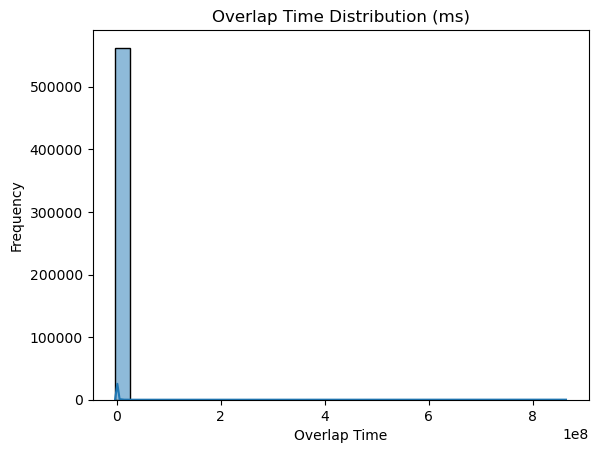

count    5.622680e+05
mean     6.823897e+04
std      1.728428e+06
min     -3.066430e+06
25%      1.068900e+04
50%      2.468700e+04
75%      5.710700e+04
max      8.643417e+08
Name: overlap_time, dtype: float64


In [8]:
sns.histplot(df['overlap_time'].dropna(), bins=30, kde=True)
plt.title('Overlap Time Distribution (ms)')
plt.xlabel('Overlap Time')
plt.ylabel('Frequency')
plt.show()
print(df['overlap_time'].describe())

EDA on Question Types and Skills

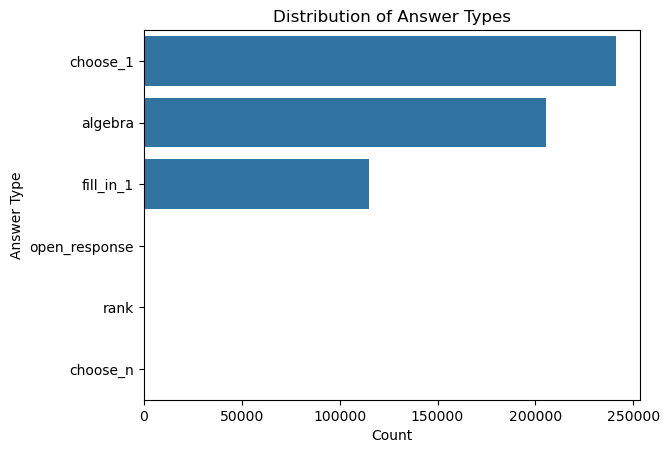

answer_type
choose_1         241195
algebra          205414
fill_in_1        114876
open_response       586
rank                164
choose_n             33
Name: count, dtype: int64


In [9]:
sns.countplot(y='answer_type', data=df, order=df['answer_type'].value_counts().index)
plt.title('Distribution of Answer Types')
plt.xlabel('Count')
plt.ylabel('Answer Type')
plt.show()
print(df['answer_type'].value_counts())

Number of unique skills: 525


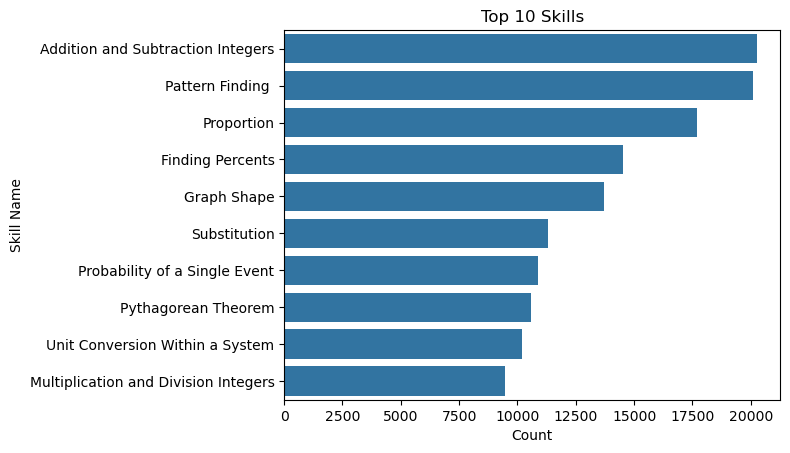

In [10]:
print("Number of unique skills:", df['skill_id'].nunique())
top_skills = df['skill_name'].value_counts().head(10)
sns.barplot(y=top_skills.index, x=top_skills.values)
plt.title('Top 10 Skills')
plt.xlabel('Count')
plt.ylabel('Skill Name')
plt.show()

EDA on Hints Usage

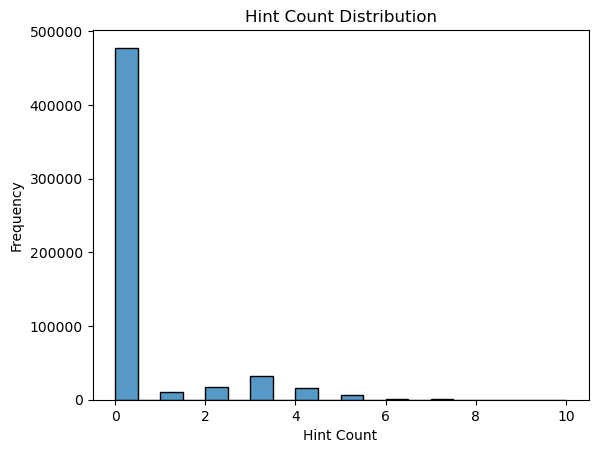

count    562268.000000
mean          0.439141
std           1.139588
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: hint_count, dtype: float64


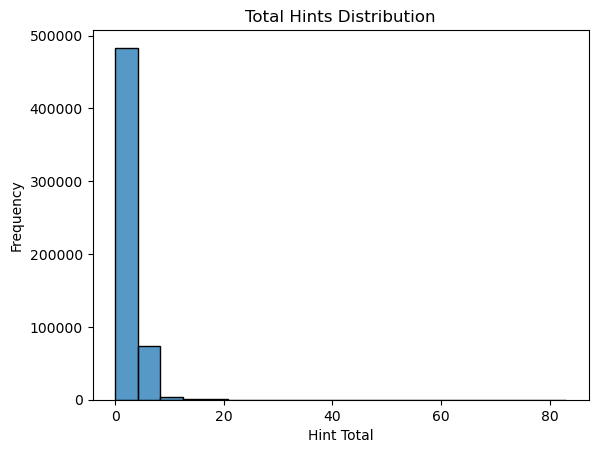

count    562268.000000
mean          2.332279
std           2.403852
min           0.000000
25%           0.000000
50%           3.000000
75%           4.000000
max          83.000000
Name: hint_total, dtype: float64


In [11]:
sns.histplot(df['hint_count'].dropna(), bins=20, kde=False)
plt.title('Hint Count Distribution')
plt.xlabel('Hint Count')
plt.ylabel('Frequency')
plt.show()
print(df['hint_count'].describe())

sns.histplot(df['hint_total'].dropna(), bins=20, kde=False)
plt.title('Total Hints Distribution')
plt.xlabel('Hint Total')
plt.ylabel('Frequency')
plt.show()
print(df['hint_total'].describe())

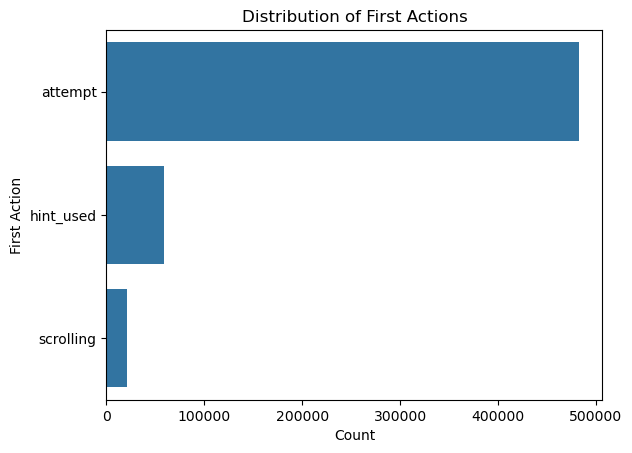

first_action
attempt      482446
hint_used     58953
scrolling     20861
Name: count, dtype: int64


In [12]:
action_labels = {0: 'attempt', 1: 'hint_used', 2: 'scrolling'}
df['first_action_label'] = df['first_action'].map(action_labels)

sns.countplot(y='first_action_label', data=df, order=['attempt', 'hint_used', 'scrolling'])
plt.title('Distribution of First Actions')
plt.xlabel('Count')
plt.ylabel('First Action')
plt.show()
print(df['first_action'].value_counts().rename(index=action_labels))

Data Cleaning

In [23]:
# Remove rows where 'skill_name' is only ',' or empty/whitespace
cleaned_df = df[
    (df['skill_name'].notnull()) &
    (df['skill_name'].str.strip() != ',') &
    (df['skill_name'].str.strip() != '')
][[
    'order_id', 'correct', 'answer_type',
    'sequence_id', 'skill_name', 'hint_count', 'overlap_time'
]].copy()
print("Shape of cleaned_df:", cleaned_df.shape)
cleaned_df.head(10)

Shape of cleaned_df: (557878, 7)


,order_id,correct,answer_type,sequence_id,skill_name,hint_count,overlap_time
0,20223588,1.0,choose_1,5366,Symbolization,0,57310
1,20223595,1.0,choose_1,5366,Symbolization,0,88691
2,20223601,1.0,choose_1,5366,Symbolization,0,43748
6,20223948,1.0,algebra,2655,Effect of Changing Dimensions of a Shape Prpor...,0,95637
7,20223955,1.0,choose_1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,227226
8,20223963,1.0,choose_1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,165891
9,20223971,1.0,choose_1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,129112
11,20223984,1.0,choose_1,2655,"Addition Whole Numbers,",0,87127
13,20224018,1.0,choose_1,2654,"Number Line,",0,179111
15,20224039,1.0,algebra,2654,"Multiplication Whole Numbers,Pattern Finding ,",0,30964


In [30]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557064 entries, 0 to 603127
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      557064 non-null  int64  
 1   correct       557064 non-null  float64
 2   answer_type   557064 non-null  object 
 3   sequence_id   557064 non-null  int64  
 4   skill_name    557064 non-null  object 
 5   hint_count    557064 non-null  int64  
 6   overlap_time  557064 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 34.0+ MB


In [25]:
cleaned_df['hint_count'].value_counts()

hint_count
0     474075
3      32713
2      16573
4      16013
1      11032
5       6174
6        927
7        340
8         29
10         1
9          1
Name: count, dtype: int64

In [26]:
# Remove rows where 'hint_count' is 8, 9, or 10 (outliers)
cleaned_df = cleaned_df[~cleaned_df['hint_count'].isin([8, 9, 10])]
print("Shape of cleaned_df after removing hint_count outliers:", cleaned_df.shape)
cleaned_df['hint_count'].value_counts()

Shape of cleaned_df after removing hint_count outliers: (557847, 7)


hint_count
0    474075
3     32713
2     16573
4     16013
1     11032
5      6174
6       927
7       340
Name: count, dtype: int64

In [27]:
cleaned_df['answer_type'].value_counts()

answer_type
choose_1         238288
algebra          203906
fill_in_1        114870
open_response       586
rank                164
choose_n             33
Name: count, dtype: int64

In [28]:
# Remove rows where answer_type is 'open_response', 'rank', or 'choose_n'
cleaned_df = cleaned_df[~cleaned_df['answer_type'].isin(['open_response', 'rank', 'choose_n'])]
print("Shape of cleaned_df after removing specified answer_types:", cleaned_df.shape)
cleaned_df['answer_type'].value_counts()

Shape of cleaned_df after removing specified answer_types: (557064, 7)


answer_type
choose_1     238288
algebra      203906
fill_in_1    114870
Name: count, dtype: int64

In [36]:
# Print full value counts for sequence_id and order_id
print("Value counts for sequence_id:")
print(cleaned_df['sequence_id'].value_counts())

print("\nValue counts for order_id:")
print(cleaned_df['order_id'].value_counts())


Value counts for sequence_id:
sequence_id
2845     13076
11069    12640
3        10958
2854     10877
2635     10794
         ...  
10329        1
5388         1
5390         1
5382         1
10776        1
Name: count, Length: 739, dtype: int64

Value counts for order_id:
order_id
20223588    1
33267752    1
33267687    1
33267690    1
33267697    1
           ..
27633794    1
27633774    1
27633756    1
27633707    1
38310112    1
Name: count, Length: 557064, dtype: int64
